In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.date_dayfirst", True)
pd.set_option("display.date_yearfirst", False)
#pd.describe_option('display.date_yearfirst')
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.mlab as mlab

import matplotlib.pylab as pylab

import os
cwd = os.getcwd()

#import seaborn.apionly as sns

C:\Anaconda3\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


#Import excel file into pandas dataframe

In [30]:
#mainpath = 'C:/Users/mb22/OneDrive/PhD/Quasar Shared/'
#filepath = 'Data/NPL_Table_All.xlsx'
filepath = 'Data to Import/All_Ext_OPs-Jan-Jun2015-06Apr16-Anon.xlsx'

#fullpath=mainpath+filepath
fullpath=cwd+'/'+filepath # use if need to specify full path for some reason.
print(fullpath) #note forward and backward slashes in output

#all_data = pd.read_excel(filepath, parse_dates=['Date'])
all_data = pd.read_excel(filepath)
#all_data.head(2)
all_data.describe()

C:\Users\mb22\OneDrive\PhD\Quasar Shared\Modelling\IPython/Data to Import/All_Ext_OPs-Jan-Jun2015-06Apr16-Anon.xlsx


,Centre_ID,Group,Linac_ID,OP_Dif
count,26166.000000,26166.000000,26166.000000,26166.000000
mean,23.352022,4.117863,106.868035,-0.031053
std,16.903963,2.244406,61.950177,6.805778
min,1.000000,1.000000,1.000000,-147.646242
25%,10.000000,2.000000,57.000000,-0.572493
50%,18.000000,4.000000,106.000000,0.000000
75%,41.000000,6.000000,168.000000,0.578704
max,52.000000,9.000000,204.000000,900.680000


## Remove Unwanted Dates & Outliers

In [31]:
cutoff_perc = 5.0

all_data = all_data[(all_data.OP_Dif >-cutoff_perc)
                   & (all_data.OP_Dif < cutoff_perc)
                   & (all_data.Date < "01/July/2015")
                   & (all_data.Date >= "01/Jan/2015")]
all_data.describe()
#all_data.head()

,Centre_ID,Group,Linac_ID,OP_Dif
count,24501.000000,24501.000000,24501.000000,24501.000000
mean,21.584180,4.259704,101.157218,-0.009354
std,15.938045,2.248378,59.686101,0.878064
min,1.000000,1.000000,1.000000,-4.400000
25%,10.000000,2.000000,53.000000,-0.600000
50%,18.000000,4.000000,99.000000,0.000000
75%,36.000000,6.000000,148.000000,0.561393
max,52.000000,9.000000,204.000000,3.980000


# Calculate some stats & check data types

In [35]:
mean = np.mean(all_data['OP_Dif'])
sd = np.std(all_data['OP_Dif'])
all_data.describe()
#all_data.dtypes

#all_data.groupby(['Type'])['Energy'].nunique().reset_index() # number of unique dates = number of visits

,Centre_ID,Group,Linac_ID,OP_Dif
count,24501.000000,24501.000000,24501.000000,24501.000000
mean,21.584180,4.259704,101.157218,-0.009354
std,15.938045,2.248378,59.686101,0.878064
min,1.000000,1.000000,1.000000,-4.400000
25%,10.000000,2.000000,53.000000,-0.600000
50%,18.000000,4.000000,99.000000,0.000000
75%,36.000000,6.000000,148.000000,0.561393
max,52.000000,9.000000,204.000000,3.980000


# Make some quick graphs

### Plot of each centres distribution

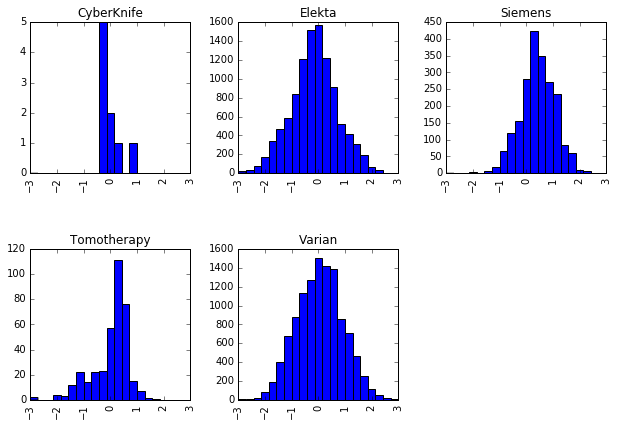

In [36]:
## Linac Manufacturer
all_data['OP_Dif'].hist(by=all_data['Linac_Manufacturer'], normed=False, bins=21, range=(-3,3), rwidth=1, figsize=(10,7), layout=(2,3))
#plt.savefig('OPs/All_Hist_Manufacturer.png', bbox_inches='tight', dpi=300)

## Linac Model
#all_data['OP_Dif'].hist(by=all_data['Linac_Model'], normed=False, bins=11, range=(-3,3), rwidth=1, figsize=(18,18))
#plt.savefig('OPs/All_Hist_Model.png', bbox_inches='tight', dpi=300)

## Install Year
#all_data['OP_Dif'].hist(by=all_data['Linac_Install_Date'], normed=False, bins=11, range=(-3,3), rwidth=1, figsize=(16,9), layout=(3,6))
#plt.savefig('OPs/All_Hist_Year.png', bbox_inches='tight', dpi=300)

## Centre
#all_data['OP_Dif'].hist(by=all_data['Centre_ID'], normed=False, bins=11, range=(-3,3), rwidth=1, figsize=(18,18))
#plt.savefig('OPs/All_Hist_Centre.png', bbox_inches='tight', dpi=300)

## Region
#all_data['OP_Dif'].hist(by=all_data['Group'], normed=False, bins=21, range=(-3,3), rwidth=1, figsize=(8,8))
#plt.savefig('OPs/All_Hist_Region.png', bbox_inches='tight', dpi=300)

## All Data
#all_data['OP_Dif'].hist(normed=False, bins=24, range=(-3.0,3.0), rwidth=1, figsize=(8,8))
#plt.savefig('OPs/All_Hist.png', bbox_inches='tight', dpi=300)

plt.show()


# Histograms

## Ideally make into a function and feed data frame, title, filename

# Get some more stats such as Mean, SD, Skew etc.

In [37]:
from scipy import stats

print('Skew: ', all_data['OP_Dif'].skew())
print('SEM: ', all_data['OP_Dif'].sem())
print('Mean: ', all_data['OP_Dif'].mean())
print('SD: ', all_data['OP_Dif'].std()) # Need to remove outliers for useful stats
print('Kurtosis: ', all_data['OP_Dif'].kurtosis())
print('stats.kurtosis: ', stats.kurtosis(all_data['OP_Dif'], axis=0, fisher=False, bias=False))
print('Max: ', all_data['OP_Dif'].max())
print('Min: ', all_data['OP_Dif'].min())

print('Skew Test: ', stats.skewtest(all_data['OP_Dif']))
print('Kurtosis Test: ', stats.kurtosistest(all_data['OP_Dif']))
print('Norm Test: ', stats.normaltest(all_data['OP_Dif']))


Skew:  -0.0669038624212
SEM:  0.00560962869641
Mean:  -0.0093536487178
SD:  0.878063695678
Kurtosis:  0.32896607735
stats.kurtosis:  3.3289660773497305
Max:  3.98
Min:  -4.4
Skew Test:  SkewtestResult(statistic=-4.2715885176058723, pvalue=1.9408545813046504e-05)
Kurtosis Test:  KurtosistestResult(statistic=9.0786470384086169, pvalue=1.0993281364664905e-19)
Norm Test:  NormaltestResult(statistic=100.66830051174789, pvalue=1.3808811225161067e-22)


### Non-normal?
The tests for normality have p values which indicate the resutls are non-normal. 
This is liekly due tot he large amounts of data, which can cause even very small deviations from normality to be statistically different from normal.

I think in our case, if required the distributions can be considered as normal (e.g. if want to calcualte how many centres are outside a given range)

# Plot of All Audits

In [75]:
# Calculate rolling SD of 20 values

all_data_datesort = all_data.sort_values(by='Date', ascending=True)

all_data_datesort['SD_Prev1000'] = np.nan
#all_data_datesort['SD_Prev1000'] = pd.rolling_std(all_data_datesort['OP_Dif'],window=1000) ## pre v18 of pandas
all_data_datesort['SD_Prev1000'] = all_data_datesort['OP_Dif'].rolling(window=1000,center=False).std()

#all_data_datesort['Mean_Prev1000'] = pd.rolling_mean(all_data_datesort['OP_Dif'],window=1000) ## pre v18 of pandas
all_data_datesort['Mean_Prev1000'] = all_data_datesort['OP_Dif'].rolling(window=1000,center=False).mean()

all_data_datesort.tail(3)


,Centre_ID,NHS_PP,Group,Linac_Manufacturer,Linac_Model,Linac_Install_Date,Linac_ID,Date,Measurement_Device,OP_Dif,Recording,Comments,SD_Prev1000,Mean_Prev1000
2293,2,NHS,6,Varian,2100CD,2010,17,2015-06-30 15:34:12,Linacheck,1.000000,Database,NaN,0.873266,0.230469
2014,2,NHS,6,Varian,2100CD,2010,15,2015-06-30 15:43:42,Linacheck,-0.400000,Database,NaN,0.873419,0.229479
1185,2,NHS,6,Varian,2100CD,2006,10,2015-06-30 19:08:38,Farmer Chamber in Water,-0.781194,Database,NaN,0.874000,0.228550


### To do with OPs

- Loop through each linac and calc mean & SD for outputs.
	- SD will give indication of measurement variability
	- Can plot spread of means = variation present depending on linac which treated on.
	- Output table (array) of linac ID, mean, SD
- Loop through each centre - done by using 'groupby'
    - Mean + SD for each centre

## Centre grouping

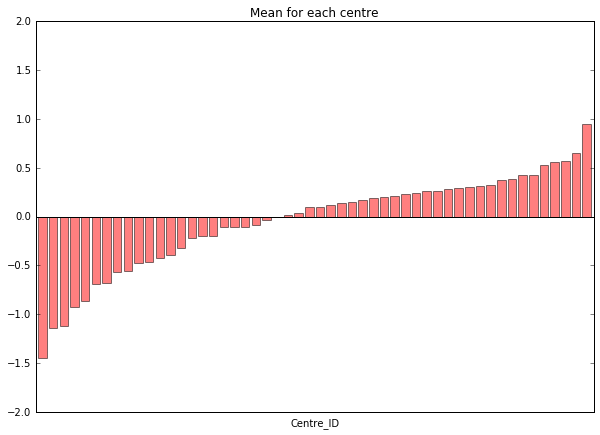

In [76]:
m = all_data_datesort[(all_data_datesort.OP_Dif >-5) & (all_data_datesort.OP_Dif < 5)] # remove outliers

#m = all_data_datesort
g = m.groupby('Centre_ID')
gmean = g.mean()
#gmean = gmean.sort(['OP_Dif'], ascending=True) ## pre v18 of pandas
gmean = gmean.sort_values(by='OP_Dif', ascending=True)
gsd=g.std()
gsdneg=-gsd
gsdnorm=gmean+gsd # to ensure SD is centred around mean
gsdnegnorm=gmean-gsd

## If want to also show SD on same plot, then need to order the SDs in the same order as the means...

plt.figure(figsize=(10,7))
myplotcentre = gmean['OP_Dif'].plot(kind='bar', color='red', alpha = 0.5, width=0.8)
#myplotcentre = gsdnorm['OP_Dif'].plot(kind='bar', color='blue', alpha = 0.5) # SD but best to do a box plot?
#myplotcentre = gsdnegnorm['OP_Dif'].plot(kind='bar', color='blue', alpha = 0.5)
plt.axhline(0, color='black')

myplotcentre.axes.get_xaxis().set_ticks([])

plt.ylim(-2,2)
plt.title("Mean for each centre")

#plt.savefig('OPs/All_Centre_Means-bar-corr.png', bbox_inches='tight', dpi=300)

## Linac Grouping

Mean Max: 1.63777777778
Mean Min: -2.09007092199
Mean Range: 3.72784869976


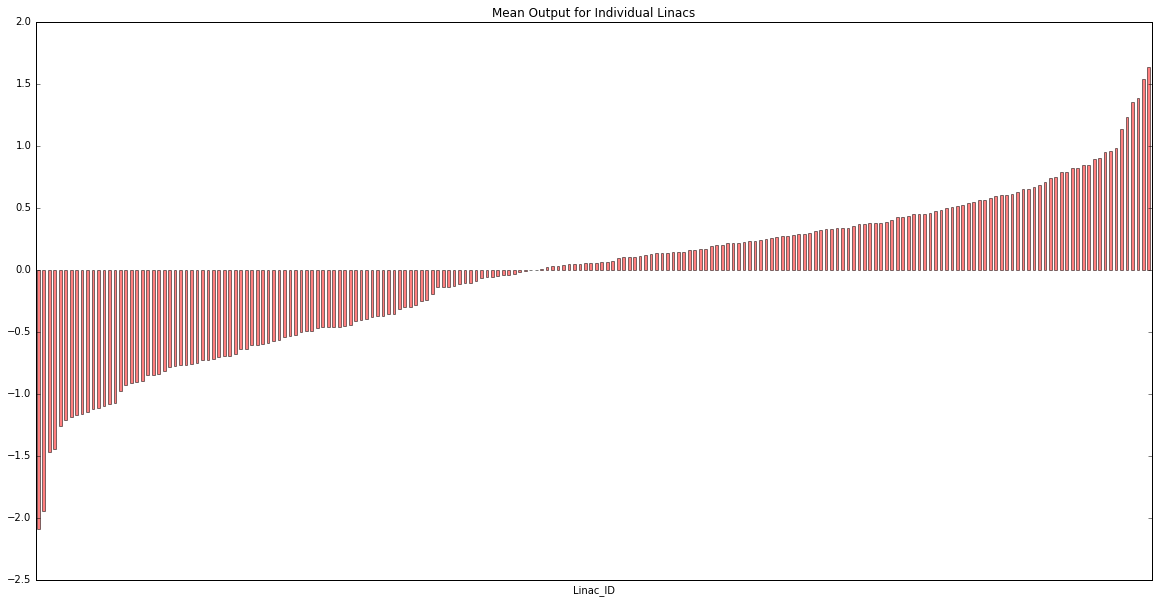

In [77]:
plt.figure(figsize=(20,10))
#plt.rcParams.update({'font.size': 22})
l = m.groupby('Linac_ID')
## calc mean for each linac
lmean = l.mean()
## sort into order
#lmean = lmean.sort(['OP_Dif'], ascending=True) ## pre v18 of pandas
lmean = lmean.sort_values(by='OP_Dif', ascending=True)
lsd=l.std()
#lsd = lsd.sort(['OP_Dif'])
lsdneg=-lsd
lsdnorm=lmean+lsd # to ensure SD is centred around mean
lsdnegnorm=lmean-lsd
myplotlinac = lmean['OP_Dif'].plot(kind='bar', color='red', alpha = 0.5, width = 0.5)
plt.title("Mean Output for Individual Linacs")

### These need to be ordered the same as the linacs to be useful
#myplotlinac = lsdnorm['OP_Dif'].plot(kind='bar', color='blue', alpha = 0.5, width = 0.5)
#myplotlinac = lsdnegnorm['OP_Dif'].plot(kind='bar', color='green', alpha = 0.5, width = 0.5)

myplotlinac.axes.get_xaxis().set_ticks([])

mean_max = max(lmean['OP_Dif'])
mean_min = min(lmean['OP_Dif'])
mean_range = mean_max - mean_min
print('Mean Max: ' + str(mean_max))
print('Mean Min: ' + str(mean_min))
print('Mean Range: ' + str(mean_range))

#print(lsd.mean())

#plt.savefig('OPs/All_Linacs_Means-bar-corr-large_text.png', bbox_inches='tight', dpi=300)

### Show SD on graph as error bars

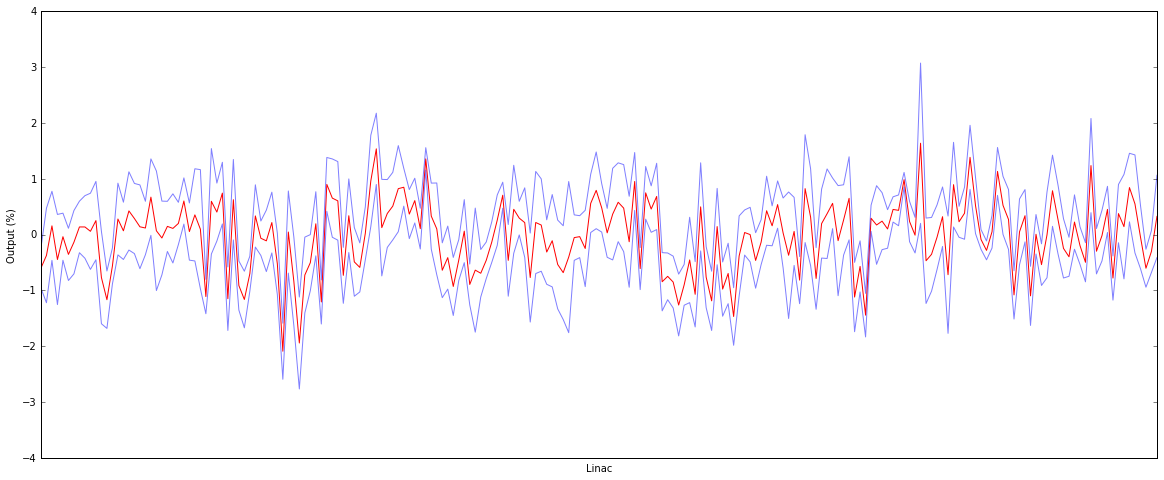

In [78]:
plt.figure(figsize=(20,8))

l = m.groupby('Linac_ID')
#l.sort(by='OP_Dif')
#l.describe()
lmean = l.mean()
#lmean = lmean.sort(['OP_Dif'], ascending=True)
#lmean = lmean.sort_values(by='OP_Dif', ascending=True)
lsd = l.std()
lsdnorm=lmean+lsd
lsdnegnorm=lmean-lsd

myplotlinac = lmean['OP_Dif'].plot(kind='line', color='red', alpha = 1)
myplotlinac = lsdnorm['OP_Dif'].plot(kind='line', color='blue', alpha = 0.5)
myplotlinac = lsdnegnorm['OP_Dif'].plot(kind='line', color='blue', alpha = 0.5)

#op_mean_sd = lmean['OP_Dif'].plot(yerr=lsd, kind='bar', width=0.5, color='red', alpha=0.5)
#plt.xlim(0,50)
plt.ylim(-4,4)
plt.ylabel('Output (%)')
plt.xlabel('Linac')

## Hide x axis tick labels (simple 1 line method used)
#plt.tick_params(
#    axis='x',          # changes apply to the x-axis
#    which='both',      # both major and minor ticks are affected
#    bottom='off',      # ticks along the bottom edge are off
#    top='off',         # ticks along the top edge are off
#    labelbottom='off')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.show()

#plt.savefig('OPs/All_Linacs_Means-bar-corr-SD.png', bbox_inches='tight', dpi=300)

### Try and get range filled in

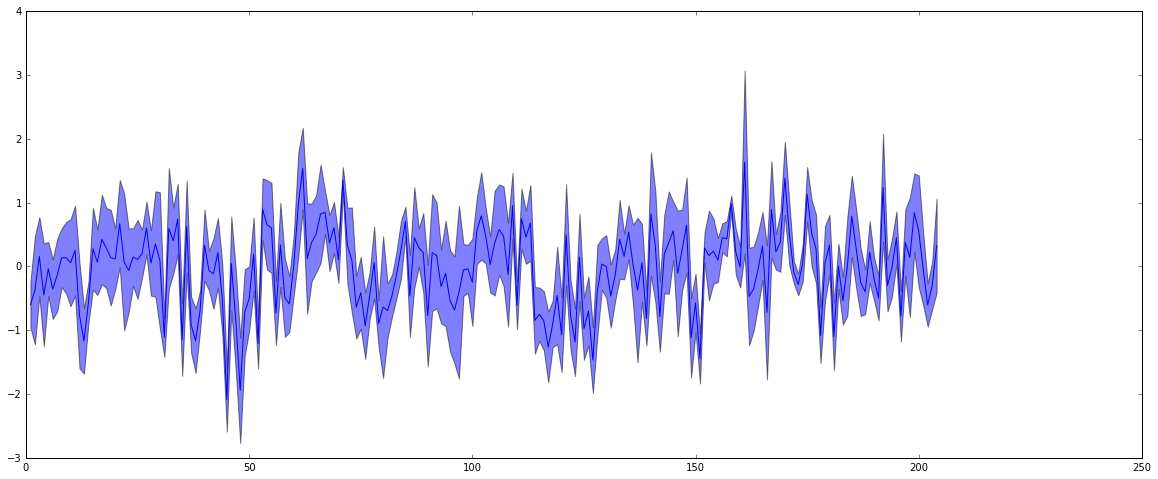

In [79]:
plt.figure(figsize=(20,8))

abc = l['OP_Dif']
l_id = l['Linac_ID'].mean()

plt.fill_between(l_id, (abc.mean()-abc.std()), (abc.mean()+abc.std()),alpha=0.5)
plt.plot(l_id,abc.mean())


#####

#If these seperate bits of data are all combined into a dataframe, then they could be sorted together.

Mean: -0.0093536487178
SD: 0.878063695678


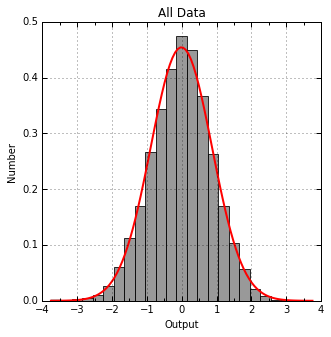

In [80]:
pylab.rcParams['figure.figsize'] = 5, 5 # change size of figures

from matplotlib.ticker import AutoMinorLocator

fig = plt.figure()
axes = fig.add_subplot(1,1,1)
plt.title('All Data')
plt.xlabel("Output")
plt.ylabel("Number")
#plt.xlim(-3.2, +3.2)
#plt.ylim(0, 60)

m['OP_Dif'].hist(bins=25, range=(-3.75, 3.75), normed=True,
                               facecolor = 'grey', alpha = 0.8, ax=axes, rwidth=1)

axes.xaxis.set_minor_locator(AutoMinorLocator(2)) #used to set the number of minor ticks between major ticks
plt.tick_params(which='major', width=1, length=5)
plt.tick_params(which='minor', width=1, length=3)
plt.grid(True, which='major')

mean = m['OP_Dif'].mean()
sd = m['OP_Dif'].std() # need to exclude outliers for this to be a useful calculation.

x = np.linspace(-3.75, 3.75, 100) # add normal distibution fit
plt.plot(x, mlab.normpdf(x,mean,sd), linewidth = 2, color='red')

print('Mean: ' + str(mean))
print('SD: ' + str(sd))
#plt.savefig('OPs/All_Hist.png', bbox_inches='tight', dpi=300)

## Want to change the colour for a centre to make it clearer? Loop through each and give a colour? or create seperate sets fo data to plot?

(735597.0, 735781.7976620371)

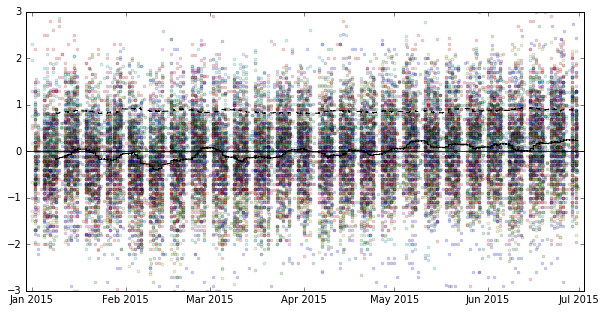

In [81]:
m = all_data_datesort[(all_data_datesort.OP_Dif >-5) & (all_data_datesort.OP_Dif < 5) & (all_data_datesort.Date < "01/July/2015")] # remove outliers
pylab.rcParams['figure.figsize'] = 10, 5 # change size of figures
#fig1 = plt.figure()
#axes1 = fig1.add_subplot(1,1,1)
#plt.title('Machine Output Variation')
#plt.xlabel("Date")
#plt.ylabel("Measured Output")
#plt.ylim(-4, 4)
#axes1.xaxis.set_minor_locator(AutoMinorLocator(4)) #used to set the number of minor ticks between major ticks
#plt.tick_params(which='major', width=1, length=5)
#plt.tick_params(which='minor', width=1, length=3)
#plt.grid(True, which='major')

#print(max(m['Centre_ID']))
#m.values
#mark_colors = np.array(m['Centre_ID'])
#print(mark_colors)

#x=np.arange(1,m['OP_Dif'].count()+1)
x=m['Date']
y=m['OP_Dif']

##This just plots all as the same colour
#plt.plot_date(x, y, alpha=0.4, color='b')
#yerr=(m['OPError']*m['OPRatio'])/100

##The below plots each centre as a different colour
df = pd.DataFrame(dict(x=m['Date'],y=m['OP_Dif'],label=m['Centre_ID']))
#df = pd.DataFrame(dict(x=m['Date'],y=m['OP_Dif'],label=m['Linac_ID']))

groups = df.groupby('label')

fig, ax = plt.subplots()
for name, group in groups:
    ax.plot_date(group.x,group.y,label=name, alpha=0.2, ms=3)
#ax.legend(loc='best')
#ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., numpoints=1, ncol=2)
plt.ylim(-3,3)
#plt.show()

ysd=m['SD_Prev1000']
ymean=all_data_datesort['Mean_Prev1000']
ax.plot(x,ysd, label='SD', color='black', ls='--')
ax.plot(x,ymean, label='Mean', color='black')
ax.axhline(0,color='black', alpha=0.8)
#ax.fill_between(x, ymean)
#ax.fill_between(t, mu1+sigma1, mu1-sigma1, facecolor='blue', alpha=0.5)
#ax.legend()
#plt.ylim(0.5,1.5)
plt.xlim(min(x)-pd.DateOffset(days=2),max(x)+pd.DateOffset(days=2))

#plt.savefig('OPs/All_date_scatter_group_by_centre-mean_sd.png', bbox_inches='tight', dpi=300)
#plt.savefig('OPs/All_date_scatter_group_by_centre.png', bbox_inches='tight', dpi=300)

### Some analysis for different linac models/measurement equipment etc

In [82]:
m.tail(1)

,Centre_ID,NHS_PP,Group,Linac_Manufacturer,Linac_Model,Linac_Install_Date,Linac_ID,Date,Measurement_Device,OP_Dif,Recording,Comments,SD_Prev1000,Mean_Prev1000
1185,2,NHS,6,Varian,2100CD,2006,10,2015-06-30 19:08:38,Farmer Chamber in Water,-0.781194,Database,NaN,0.874,0.22855


### Linac Manufacturer

Mean Max: 0.417733842655
Mean Min: -0.163863649314
Mean Range: 0.581597491969


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


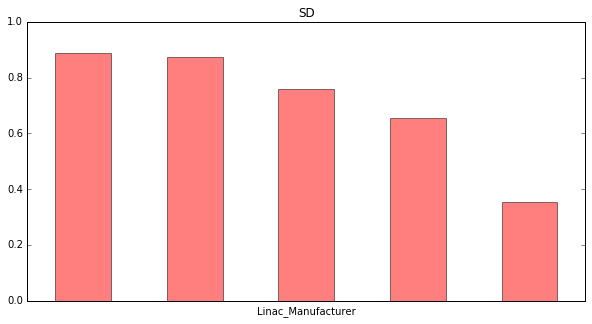

In [83]:
l = m.groupby(m['Linac_Manufacturer'])
## calc mean for each linac
lmean = l.mean()
## sort into order
lmean = lmean.sort(['OP_Dif'], ascending=False)
lsd=l.std()
lsd = lsd.sort(['OP_Dif'], ascending=False)
lsdneg=-lsd
lsdnorm=lmean+lsd # to ensure SD is centred around mean
lsdnegnorm=lmean-lsd
#myplotlinac = lmean['OP_Dif'].plot(kind='bar', color='red', alpha = 0.5)
myplotlinac = lsd['OP_Dif'].plot(kind='bar', color='red', alpha = 0.5)
plt.title('SD')
plt.ylim(0,1)

myplotlinac.axes.get_xaxis().set_ticks([])

mean_max = max(lmean['OP_Dif'])
mean_min = min(lmean['OP_Dif'])
mean_range = mean_max - mean_min
print('Mean Max: ' + str(mean_max))
print('Mean Min: ' + str(mean_min))
print('Mean Range: ' + str(mean_range))

#print(lsd.mean())

#plt.savefig('OPs/All_Linacs_Means-bar-corr-large_text.png', bbox_inches='tight', dpi=300)

In [84]:
all_data['Linac_Manufacturer'].unique() ## Names of linac manufacturers

array(['Elekta', 'Tomotherapy', 'Siemens', 'Varian', 'CyberKnife'], dtype=object)

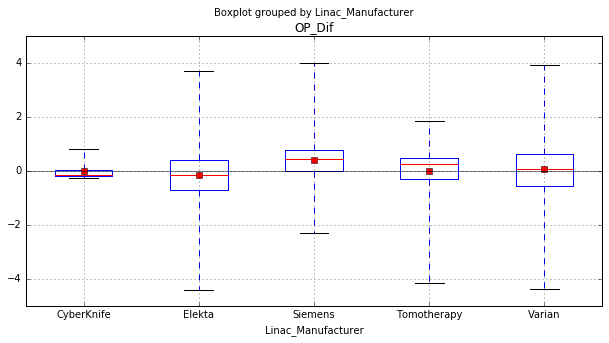

In [85]:
l_man = m
l_man_box = l_man.boxplot(column=['OP_Dif'],by='Linac_Manufacturer', whis='range', showmeans='True')
l_man_box.set_ylim(-5,5)
l_man_box.axhline(0, alpha = 0.5, color = 'black')
plt.show()


### Measurement Device

### Farmer vs Other

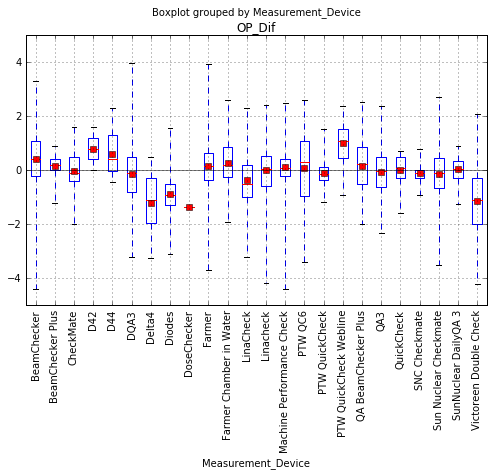

In [86]:
equip = m
equip_box = equip.boxplot(column=['OP_Dif'],by='Measurement_Device', whis='range', showmeans='True', rot=90, figsize=(8,5))
equip_box.set_ylim(-5,5)
equip_box.axhline(0, alpha = 0.5, color = 'black')
plt.show()

# Note that D44 is a DoseChecker

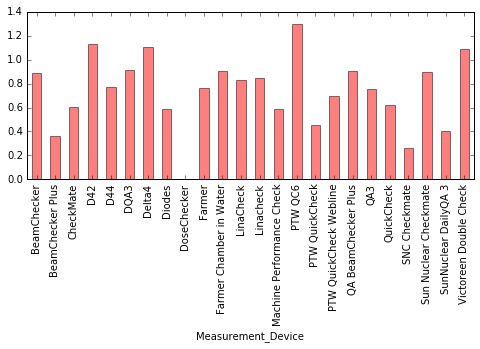

In [87]:
equip_group = m.groupby(m['Measurement_Device'])
## calc mean for each linac
equip_mean = equip_group.mean()
equip_sd = equip_group.std()

myplotequip = equip_sd['OP_Dif'].plot(kind='bar', color='red', alpha = 0.5, figsize=(8,3))

### Are Farmers better?

An intial look doesnt indicate any clear difference between the consistency of Farmer or other measurement devices.
Tehre is also no differnce seen between manufacturers.

## Age of Linac

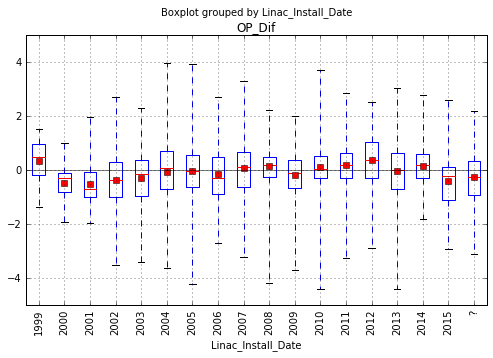

In [88]:
age = m

age_box = age.boxplot(column=['OP_Dif'],by='Linac_Install_Date', whis='range', showmeans='True', rot=90, figsize=(8,5))
age_box.set_ylim(-5,5)
age_box.axhline(0, alpha = 0.5, color = 'black')
plt.show()

#plt.savefig('OPs/Year_boxplots.png', bbox_inches='tight', dpi=300)

In [89]:
#sns.violinplot(x='Linac_Install_Date', y='OP_Dif', data=m, jitter=1, linewidth=1, hue='Linac_Manufacturer')
#sns.plt.show()

No obvious trend seen with age of linac.
In reality, you would have to know how often they require recalibrating to know this, which would be very difficult to guage form a 6 month set of data.

## Apply Gamma Values to plots
Allow determination of variation in outcomes

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


Mean Mean: -0.0337744898908
Mean Max: 1.63777777778
Mean Min: -2.09007092199
Mean Range: 3.72784869976

Mean Median: 0.0582102629024
Mean 95th Percentile: 0.89512195122
Mean 5th Percentile: -1.11927796191
Percentile Range: 2.01439991313


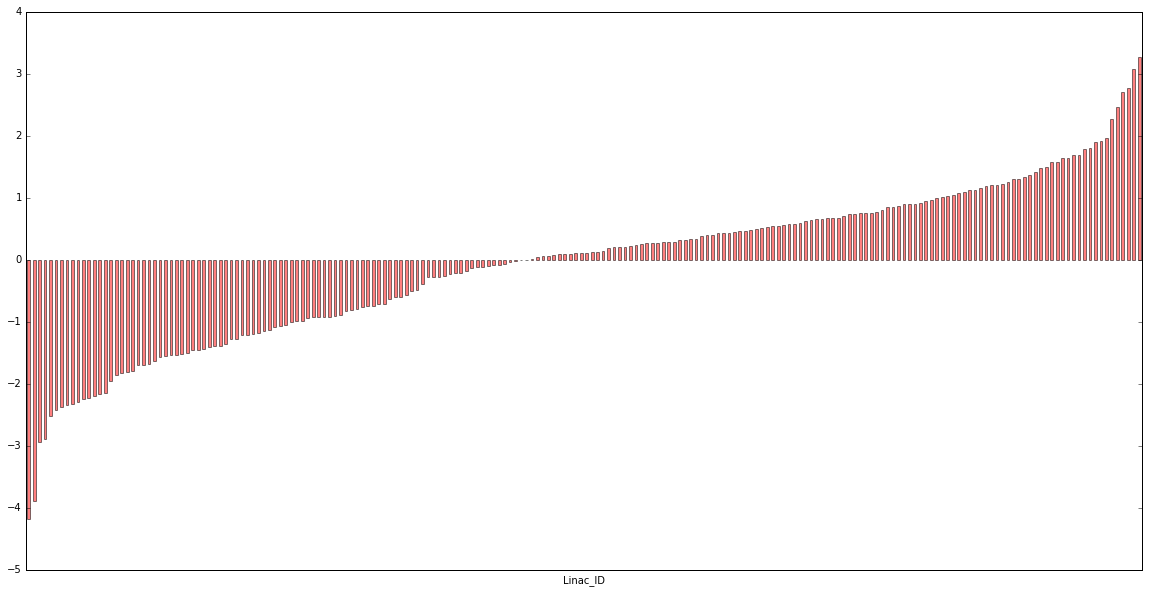

In [90]:
gamma = 2.0 ## (Bentzen used 2.3 for Tumour control, 5.2 for mild/moderate reactions, 0.9 for severe reactions)

plt.figure(figsize=(20,10))
#plt.rcParams.update({'font.size': 22})
l = m.groupby('Linac_ID')
## calc mean for each linac
lmean = l.mean()
lmean_gamma = lmean*gamma

## add an extra column with the OP multiplied by gamma value

lmean['Outcome'] = np.nan
lmean['Outcome'] = (lmean['OP_Dif']*gamma)

## sort into order
lmean = lmean.sort(['OP_Dif'], ascending=True)
lmean_gamma = lmean_gamma.sort(['OP_Dif'], ascending=True)
lsd=l.std()
lsd = lsd.sort(['OP_Dif'], ascending=True)
lsdneg=-lsd
lsdnorm=lmean+lsd # to ensure SD is centred around mean
lsdnegnorm=lmean-lsd
#myplotlinac = lmean['OP_Dif'].plot(kind='bar', color='red', alpha = 0.5)
#myplotlinac = lsd['OP_Dif'].plot(kind='bar', color='red', alpha = 0.5)
myplotlinac = lmean['Outcome'].plot(kind='bar', color='red', alpha = 0.5)

myplotlinac.axes.get_xaxis().set_ticks([])

stats_for = lmean['OP_Dif']

mean_mean = stats_for.mean()
mean_max = max(stats_for)
mean_min = min(stats_for)
mean_range = mean_max - mean_min

print('Mean Mean: ' + str(mean_mean))
print('Mean Max: ' + str(mean_max))
print('Mean Min: ' + str(mean_min))
print('Mean Range: ' + str(mean_range))

mean_med = np.median(stats_for)
mean_95 = np.percentile(stats_for, 95, interpolation='higher')
mean_05 = np.percentile(stats_for, 5, interpolation='lower')
mean_perc_range = mean_95-mean_05

print()
print('Mean Median: ' + str(mean_med))
print('Mean 95th Percentile: ' + str(mean_95))
print('Mean 5th Percentile: ' + str(mean_05))
print('Percentile Range: ' + str(mean_perc_range))

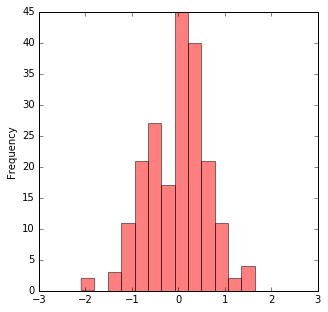

In [91]:
myplotlinac = lmean['OP_Dif'].plot(kind='hist', bins=13, color='red', alpha = 0.5, figsize=(5,5))
plt.xlim(-3,3)
plt.show()

## Are centres happier to let machiens run with low output than high?


No. Linacs outside +/- 0.0% : 204 (100.0%)
No. Linacs outside +/- 0.1% : 177 (86.8%)
No. Linacs outside +/- 0.2% : 151 (74.0%)
No. Linacs outside +/- 0.3% : 130 (63.7%)
No. Linacs outside +/- 0.4% : 108 (52.9%)
No. Linacs outside +/- 0.5% : 86 (42.2%)
No. Linacs outside +/- 0.6% : 70 (34.3%)
No. Linacs outside +/- 0.7% : 53 (26.0%)
No. Linacs outside +/- 0.8% : 39 (19.1%)
No. Linacs outside +/- 0.9% : 28 (13.7%)
No. Linacs outside +/- 1.0% : 21 (10.3%)
No. Linacs outside +/- 1.1% : 18 (8.8%)
No. Linacs outside +/- 1.2% : 11 (5.4%)
No. Linacs outside +/- 1.3% : 8 (3.9%)
No. Linacs outside +/- 1.4% : 6 (2.9%)
No. Linacs outside +/- 1.5% : 4 (2.0%)
No. Linacs outside +/- 1.6% : 3 (1.5%)
No. Linacs outside +/- 1.7% : 2 (1.0%)
No. Linacs outside +/- 1.8% : 2 (1.0%)
No. Linacs outside +/- 1.9% : 2 (1.0%)
No. Linacs outside +/- 2.0% : 1 (0.5%)
No. Linacs outside +/- 2.1% : 0 (0.0%)
No. Linacs outside +/- 2.2% : 0 (0.0%)
No. Linacs outside +/- 2.3% : 0 (0.0%)
No. Linacs outside +/- 2.4% : 0 (0

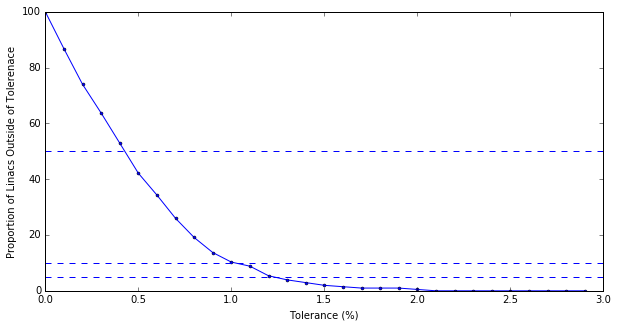

In [92]:
## how many linacs outside of 2%?

perc_tol = np.arange(0,3,0.1) # absolute tol
#perc_tol = np.arange(-3,3,0.1)
perc_tol_results= np.empty(0)

for x in perc_tol:
    lmean_oot = lmean[(lmean.OP_Dif > x) | (lmean.OP_Dif < -x)] # only consider absolute tol
    #lmean_oot = lmean[(lmean.OP_Dif > x)]
    no_oot = len(lmean_oot)
    perc_oot = (no_oot/len(lmean))*100
    perc_tol_results = np.append(perc_tol_results, no_oot)
    print('No. Linacs outside +/- ' + str(x) + '% : ' + str(no_oot) + ' (' + "%.1f" % perc_oot + '%)')
    
plt.plot(perc_tol,(perc_tol_results/len(lmean)*100), marker='o', markersize=3)
plt.axhline(50, ls='--')
plt.axhline(10, ls='--')
plt.axhline(5, ls='--')
#plt.axhline(90, ls='--') # if negative tols considered
#plt.axhline(95, ls='--') # if negative tols considered
plt.xlabel('Tolerance (%)')
plt.ylabel('Proportion of Linacs Outside of Tolerenace')

all_results = np.concatenate(([perc_tol],[perc_tol_results]),axis=1)
all_results = np.reshape(all_results,(2,len(perc_tol))).T

np.set_printoptions(precision=2, suppress=True)
#print(perc_tol_results,perc_tol)
#print(all_results)

#plt.savefig('OPs/Proportion_Linac_OOT.png', bbox_inches='tight', dpi=300)

(0.1, 9.9)

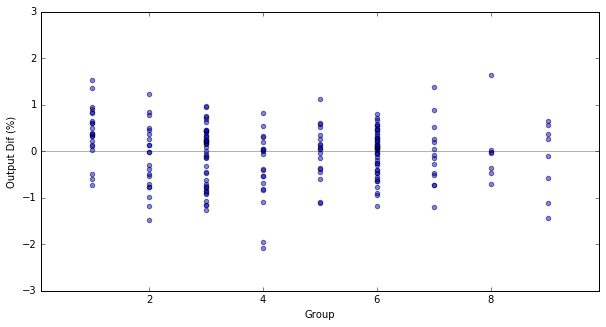

In [93]:
## Difference centres - no difference between centres seen.

plt.scatter(lmean['Group'],lmean['OP_Dif'], alpha=0.5)
plt.xlabel('Group')
plt.axhline(0, color='black', alpha=0.3)
plt.ylim(-3,3)
plt.ylabel('Output Dif (%)')
plt.xlim(0.1,9.9)


(0, 60.0)

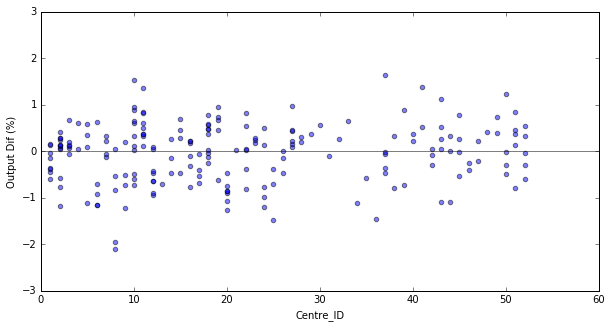

In [94]:
plt.scatter(lmean['Centre_ID'],lmean['OP_Dif'], alpha=0.5)
plt.xlabel('Centre_ID')
plt.axhline(0, color='black', alpha=0.5)
plt.ylim(-3,3)
plt.ylabel('Output Dif (%)')
plt.xlim(0,)

### What is maximum variation within centres

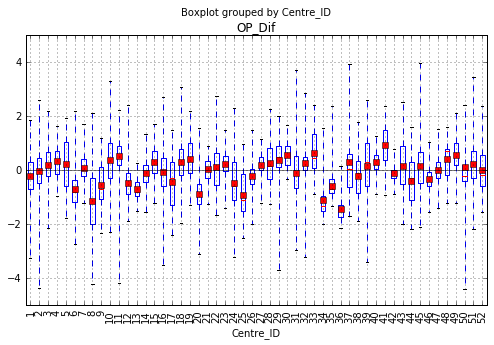

In [95]:
centre = m
centre_box = centre.boxplot(column=['OP_Dif'],by='Centre_ID', whis='range', showmeans='True', rot=90, figsize=(8,5))
centre_box.set_ylim(-5,5)
centre_box.axhline(0, alpha = 0.5, color = 'black')


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


Mean Max: 1.63777777778
Mean Min: -2.09007092199
Mean Range: 3.72784869976


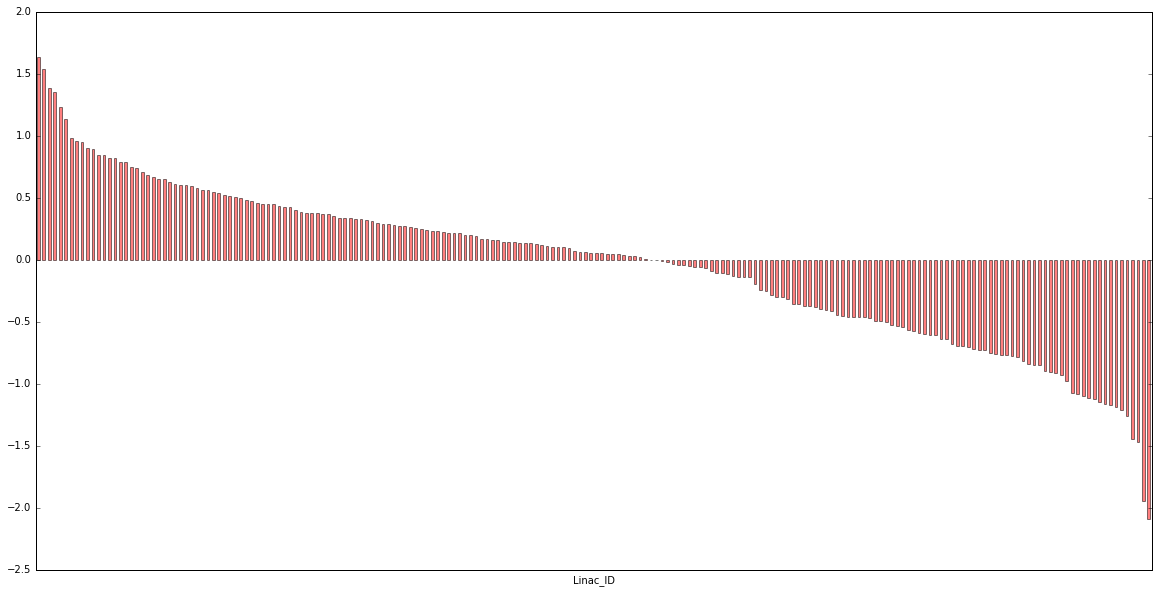

In [96]:
plt.figure(figsize=(20,10))
#plt.rcParams.update({'font.size': 22})
l = m.groupby('Linac_ID')
## calc mean for each linac
lmean = l.mean()
## sort into order
lmean = lmean.sort(['OP_Dif'], ascending=False)
lsd=l.std()
lsd = lsd.sort(['OP_Dif'], ascending=False)
lsdneg=-lsd
lsdnorm=lmean+lsd # to ensure SD is centred around mean
lsdnegnorm=lmean-lsd
myplotlinac = lmean['OP_Dif'].plot(kind='bar', color='red', alpha = 0.5)
#myplotlinac = lsd['OP_Dif'].plot(kind='bar', color='red', alpha = 0.5)

myplotlinac.axes.get_xaxis().set_ticks([])

mean_max = max(lmean['OP_Dif'])
mean_min = min(lmean['OP_Dif'])
mean_range = mean_max - mean_min
print('Mean Max: ' + str(mean_max))
print('Mean Min: ' + str(mean_min))
print('Mean Range: ' + str(mean_range))

#print(lsd.mean())

#plt.savefig('OPs/All_Linacs_Means-bar-corr-large_text.png', bbox_inches='tight', dpi=300)

1. Find mean of each linac
2. Box plot - Group by centre ID
3. Normal plot of Mean vs Centre ID

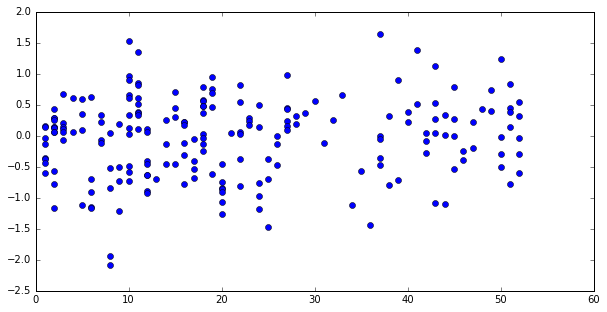

In [97]:
plt.plot(lmean['Centre_ID'], lmean['OP_Dif'], marker='o', ls='None')
lmean.groupby(lmean['Centre_ID'])

Max Range of Means in a single centre = 2.26699386503 %


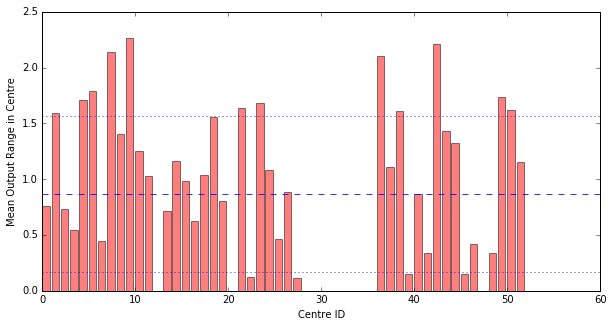

In [101]:
lmean2 = m.groupby(['Centre_ID','Linac_ID'],  as_index=True)
#lmean2g=lmean2.agg([np.mean, np.max, np.min, len]) #can calc multiple things on the grouped data

## means of all linacs for each centre
lmeang = lmean2['OP_Dif'].agg([np.mean])

## calcualte maximum and minimum within the Centre_ID groups
lmeang_max = lmeang.max(level='Centre_ID')
lmeang_min = lmeang.min(level='Centre_ID')

## calc range form min and max
lmeang_range = lmeang_max-lmeang_min

## mean and sd of all Centre means
mean_mean = np.mean(lmeang_range['mean'])
mean_sd = np.std(lmeang_range['mean'])

## print(lmeang_range)
print('Max Range of Means in a single centre = '+ str(max(lmeang_range['mean'])) + ' %')

## plot all centres ranges with mean of means and sd
plt.bar(range(len(lmeang_range)), lmeang_range['mean'], color='red', alpha=0.5)
plt.xlabel('Centre ID')
plt.ylabel('Mean Output Range in Centre')
plt.axhline(mean_mean, ls='--', alpha=0.8)
plt.axhline(mean_mean+mean_sd, ls=':', alpha=0.8)
plt.axhline(mean_mean-mean_sd, ls=':', alpha=0.8)

## Note that if only 1 linac at a site then range will be zero. These should be excluded.

 #### So Far the maximum range is in Centre 7.
 - Need to find a way fo getting this value out automatically

### Get weekly (or monthly) average and standard deviation from each linac (Linac_ID)
Use this to try and remove long term trends from calcualtion of SD.
- Calibrations should standd out as having a larger SD than the others from that group.
- Maybe ignore the 4 weeks (or month) with the largest SD as these may be calibrations.
